In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import os 
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading Csv File
dataset = pd.read_csv("diabetes.csv")

In [3]:
#top % row
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutComes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,yes
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,no
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,yes
3,1.0,23.0,43.0,NaN,NaN,NaN,0.124,NaN,NaN,no
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,no


In [4]:
#Dataset Information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               779 non-null    float64
 1   Glucose                   773 non-null    float64
 2   BloodPressure             775 non-null    float64
 3   SkinThickness             771 non-null    float64
 4   Insulin                   771 non-null    float64
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  776 non-null    object 
 7   Age                       769 non-null    float64
 8   Outcome                   777 non-null    float64
 9   OutComes                  780 non-null    object 
dtypes: float64(8), object(2)
memory usage: 61.1+ KB


In [5]:
#Total missing value in each colum
dataset.isna().sum()

Pregnancies                  1
Glucose                      7
BloodPressure                5
SkinThickness                9
Insulin                      9
BMI                         11
DiabetesPedigreeFunction     4
Age                         11
Outcome                      3
OutComes                     0
dtype: int64

In [6]:
# Row With Null Value 
missing = dataset.isna().any(axis=1)
dataset[missing]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutComes
3,1.0,23.0,43.0,NaN,NaN,NaN,0.124,NaN,NaN,no
12,2.0,22.0,NaN,1.0,NaN,NaN,22,NaN,1.0,yes
99,11.0,23.0,NaN,NaN,NaN,NaN,12,NaN,2.0,no
225,7.0,119.0,0.0,0.0,0.0,25.2,NaN,37.0,0.0,no
226,1.0,NaN,12.0,NaN,2.0,NaN,sd,NaN,NaN,no
253,2.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,1.0,yes
272,NaN,179.0,59.0,232.0,22.0,87.0,NaN,24.0,3.0,no
357,1.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,1.0,yes
408,1.0,NaN,132.0,NaN,12.0,NaN,23,NaN,23.0,no
483,1.0,NaN,231.0,NaN,NaN,NaN,23,NaN,1.0,yes


In [7]:
#remove Na Value 
dataset = dataset.dropna()

In [8]:
#After Removing  Number of Null Valued Row
missing = dataset.isna().any(axis=1)
dataset[missing]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutComes


In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutComes
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,yes
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0,no
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0,yes
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,no
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,yes


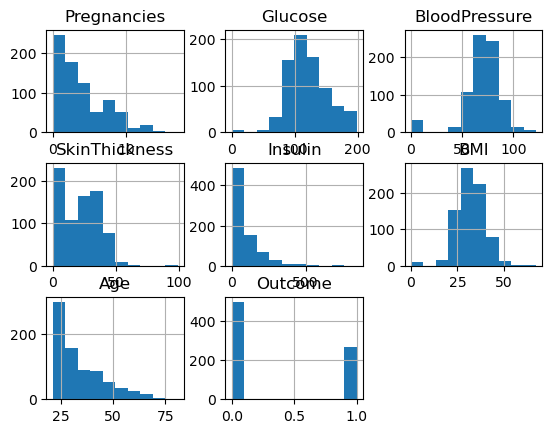

In [10]:
dataset.hist()
plt.show()

In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.839426,120.896867,69.191906,20.560052,79.861619,32.009008,33.240209,0.349869
std,3.371788,32.014312,19.218890,15.955524,115.352584,7.887842,11.774227,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.325000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,127.750000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


/tmp/ipykernel_12364/104378910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(dataset.corr())


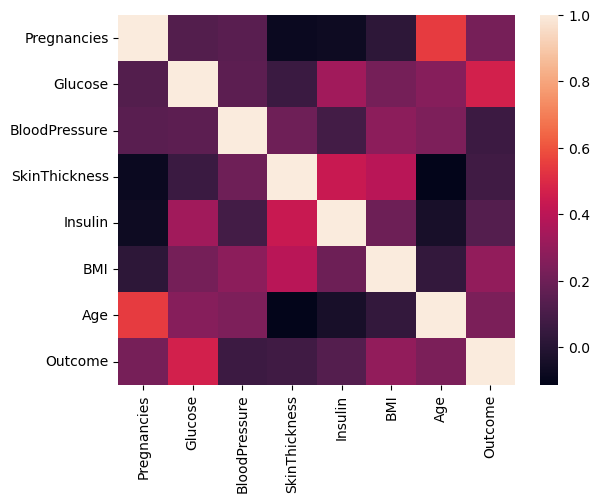

In [12]:
sbn.heatmap(dataset.corr())
plt.show()

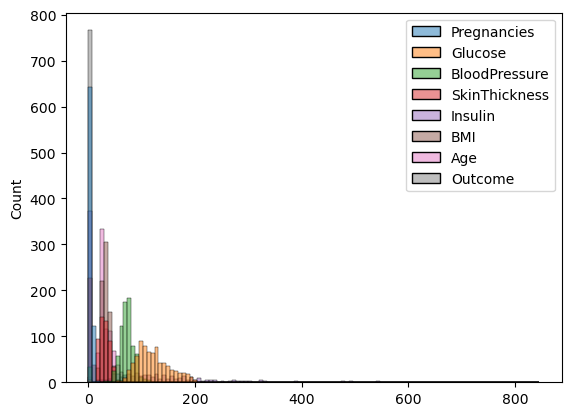

In [13]:
sbn.histplot(data=dataset)
plt.show()